# Image classification from scratch

**Author:** Balaji Chippada <br>
**Linkedin:** https://www.linkedin.com/in/balaji-chippada-0317/ <br>
**Date created:** 2024/03/27<br>
**Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

# Reference links -

1. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
3. https://stackoverflow.com/questions/56450969/how-to-calculate-output-sizes-after-a-convolution-layer-in-a-configuration-file
4. https://www.tensorflow.org/api_docs/python/tf/keras/Model


# Dataset Link

1. Credits to :- https://www.kaggle.com/datasets/salader/dogs-vs-cats?select=train

# Setting up Data Directory
Here's a breakdown of the commands and their purposes:

**Commands**

* **!mkdir -p ./kaggle**
   - **!**:  In environments like Google Colab or Jupyter Notebooks, the exclamation mark tells the system to execute the following code as a shell command, rather than native code within the notebook's language.
   - **mkdir**: This is the standard "make directory" command in Linux-like systems. It creates a new directory.
   - **-p**: This flag tells `mkdir` to create any necessary parent directories if they don't exist. So in this case, if there's no existing directory structure, it will create the necessary parent folders to place "kaggle" at the end.
   - **./kaggle**: This specifies the path where you want the directory created. The "./"  means "in the current working directory," and "kaggle" is the name of the directory to be created.

* **!cp kaggle.json ~/.kaggle/**
   - **!**: Again, this signifies a shell command.
   - **cp**: This is the standard "copy" command in Linux-like systems.  
   - **kaggle.json**: This is the name of the file you want to copy. You must have a file called "kaggle.json" present in your current directory. This file typically contains your Kaggle API credentials.
   - **~/.kaggle/**:  This is the destination for the copy.
       - **~**: The tilde symbol represents your user's home directory.
       - **.kaggle**: This refers to a hidden directory named ".kaggle". It's the standard location for storing Kaggle configuration files.

**Purpose**

These commands are often used together to set up the Kaggle API for use in environments like Google Colab or Jupyter Notebooks. Here's what they do:

1. **Create a Kaggle directory:** The first command creates a directory called "kaggle" in your current working directory if it doesn't already exist. This is a convenient place to temporarily store the Kaggle configuration file.

2. **Copy the Kaggle configuration file:** The second command copies your `kaggle.json` file (which contains your Kaggle API key) into the standard `.kaggle` hidden directory within your home directory. The Kaggle API expects to find your credentials in this location.

**Important Notes:**

* You need to have a file named `kaggle.json` with your valid Kaggle API credentials in your current working directory for this to work. You can obtain your Kaggle API key from your account settings on the Kaggle website.
* These commands assume you're working in a Linux-like environment. They might need adjustment if you are using a different operating system.

Let me know if you'd like any further clarification!


In [8]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [12]:
!pip install kaggle -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


This command will download the dataset as a zip file in your current working directory. If you wish to download it to a specific directory, you can use the `-p` or `--path` option to specify the download location. For example:


In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:12<00:00, 217MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.6MB/s]


The command you've provided is used to unzip the `dogs-vs-cats.zip` file into a specified directory. In this case, you're extracting the contents of the zip file into the `/content/` directory. This is a common operation when working with compressed datasets, especially in environments like Google Colab or other Linux-based systems where you have access to a terminal or a command-line interface.

Here's a breakdown of the command:

- `!unzip`: The `unzip` command is used to extract files from a ZIP archive. The `!` at the beginning is used in Jupyter notebooks (like Google Colab) to execute shell commands.
- `/content/dogs-vs-cats.zip`: This specifies the path to the ZIP file you want to extract. Adjust this path if your ZIP file is located elsewhere.
- `-d /content/`: The `-d` option specifies the destination directory where the files should be extracted. In this case, it's `/content/`, which is a common working directory in Google Colab.

Before running this command, ensure that:
1. The ZIP file (`dogs-vs-cats.zip`) exists at the specified location (`/content/`).
2. You have the necessary permissions to read the ZIP file and write to the destination directory.

If you're running this in a Jupyter notebook environment like Google Colab, simply paste the command into a cell and run it. If you're using a terminal, you can omit the `!` at the beginning and run the command directly.

If you encounter any errors during the extraction process, make sure to check the path to the ZIP file and the destination directory to ensure they are correct.

In [14]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# Installing the required libraries

The command you've shared is used to install several key Python libraries that are essential for machine learning and data science projects, specifically focusing on deep learning applications. Here's a brief overview of each library you're installing:

1. **TensorFlow**: An open-source library for numerical computation and machine learning. TensorFlow offers a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML, and developers easily build and deploy ML-powered applications.

2. **NumPy**: Stands for Numerical Python, and it's a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It can be utilized to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

3. **Matplotlib**: A plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. It's widely used for data visualization to make graphs and plots easier to understand.

4. **Keras**: An open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Up until version 2.3, Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano. However, from version 2.4 onwards, only TensorFlow is supported. Keras simplifies many operations and is designed to facilitate fast experimentation with deep neural networks.

The command you've provided uses `pip3`, which is the package installer for Python 3. This command will download and install the latest versions of these libraries from the Python Package Index (PyPI). If you're running this command in a Jupyter notebook or a similar environment, you might need to prefix it with `!` to execute it as a shell command:

```sh

!pip3 install tensorflow numpy matplotlib keras

```

If you're executing this command in a terminal, you do not need the `!`:

```sh

pip3 install tensorflow numpy matplotlib keras

```

Make sure your Python environment is properly set up and that `pip3` is pointing to the correct Python version you intend to use for your project.

In [15]:
!pip3 install tensorflow numpy matplotlib keras -U -q

# Importing Packages

**Core Libraries**

* **matplotlib.pyplot as plt**:  This imports the popular Matplotlib plotting library and gives it the shorter alias 'plt'. Matplotlib is used for creating various visualizations like graphs, charts, and images.

* **PIL import Image**: The Python Imaging Library (PIL) is imported, specifically the `Image` class. This is used for loading and basic manipulation of image files.

* **random**: Python's built-in random module provides functions for generating pseudo-random numbers, which can be useful for selecting random images, shuffling data, or for randomizing elements in transformations.

* **os**: Python's `os` module provides tools for interacting with the operating system. Functions from this module could be used for tasks like listing files in a directory or checking file paths.

**TensorFlow and Keras**

* **tensorflow as tf**:  Imports the core TensorFlow library, giving it the alias 'tf'. TensorFlow is a powerful framework for numerical computation and machine learning, especially deep learning.

* **tensorflow.keras layers, models**: Imports the layers and model components from the high-level Keras API within TensorFlow.
    * **layers**: Includes different types of layers (like convolutional layers, dense layers, pooling layers) that form the building blocks of neural networks.
    * **models**: Provides tools for defining and training neural networks architectures.

**NumPy**

* **numpy as np**: Imports the fundamental numerical computing library NumPy, aliased as 'np'. NumPy provides powerful array and matrix operations essential for working with image data and in machine learning.

**Other Specific Imports**

* **tensorflow.keras.preprocessing.image.ImageDataGenerator**: Provides the `ImageDataGenerator` class, used for image preprocessing and, importantly, data augmentation (creating variations of images to improve model robustness).

* **tensorflow.keras.preprocessing.image import load_img**:  Imports a function for loading an image file from disk.

* **keras.utils import plot_model**: Function to generate a graphical visualization of your Keras model's structure.

* **sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc**:  Imports various functions from scikit-learn for evaluating machine learning models:
    * **confusion_matrix**: Creates a confusion matrix to visualize model performance.
    * **classification_report**: Generates a summary report of precision, recall, F1-score, etc.
    * **roc_curve, auc**: Tools for generating the ROC (Receiver Operating Characteristic) curve and calculating the AUC (Area Under the Curve) metric.

* **seaborn as sns**:  Imports the Seaborn library, which is built upon Matplotlib and offers high-level functions for creating visually appealing and informative statistical plots.  

* **tensorflow.keras.preprocessing.image import img_to_array**: Function to convert a loaded PIL image into a NumPy array suitable for use with TensorFlow models.


In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Reading the data

In [17]:
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg', '/content/dogs_vs_cats/train/cats/cat.1.jpg']

In [18]:
os.listdir('/content/dogs_vs_cats/train/dogs')

['dog.6701.jpg',
 'dog.4926.jpg',
 'dog.10055.jpg',
 'dog.4983.jpg',
 'dog.12009.jpg',
 'dog.8650.jpg',
 'dog.8576.jpg',
 'dog.10631.jpg',
 'dog.10868.jpg',
 'dog.3987.jpg',
 'dog.3592.jpg',
 'dog.2579.jpg',
 'dog.9639.jpg',
 'dog.10242.jpg',
 'dog.2030.jpg',
 'dog.2890.jpg',
 'dog.4473.jpg',
 'dog.1993.jpg',
 'dog.12155.jpg',
 'dog.6417.jpg',
 'dog.4000.jpg',
 'dog.5496.jpg',
 'dog.6245.jpg',
 'dog.9256.jpg',
 'dog.4933.jpg',
 'dog.8457.jpg',
 'dog.2493.jpg',
 'dog.12204.jpg',
 'dog.4860.jpg',
 'dog.8248.jpg',
 'dog.3009.jpg',
 'dog.2646.jpg',
 'dog.3570.jpg',
 'dog.10815.jpg',
 'dog.3847.jpg',
 'dog.10589.jpg',
 'dog.6322.jpg',
 'dog.2694.jpg',
 'dog.6394.jpg',
 'dog.690.jpg',
 'dog.11198.jpg',
 'dog.10761.jpg',
 'dog.6490.jpg',
 'dog.6076.jpg',
 'dog.4588.jpg',
 'dog.3012.jpg',
 'dog.9530.jpg',
 'dog.10966.jpg',
 'dog.11771.jpg',
 'dog.7510.jpg',
 'dog.9990.jpg',
 'dog.6420.jpg',
 'dog.3251.jpg',
 'dog.6321.jpg',
 'dog.1484.jpg',
 'dog.6959.jpg',
 'dog.8631.jpg',
 'dog.618.jpg',
 'd

In [19]:
random.sample(os.listdir('/content/dogs_vs_cats/train/dogs'), 5)

['dog.9429.jpg',
 'dog.1270.jpg',
 'dog.2996.jpg',
 'dog.3628.jpg',
 'dog.11097.jpg']

In [21]:
/content/dogs_vs_cats/train/cats/cat.0.jpg

SyntaxError: invalid syntax (<ipython-input-21-b5e7b66247a9>, line 1)

In [22]:
os.path.join("/content/dogs_vs_cats/train/cats/", 'cat.0.jpg')

'/content/dogs_vs_cats/train/cats/cat.0.jpg'



**Purpose**

This function is designed to display a random selection of images from a specified directory, along with a standardized title indicating the class of animal the images represent.

**Explanation**

1. **Import and Setup**
   - `os.listdir(directory_path)`: This line gets a list of all the filenames (images in this case) within the provided `directory_path`.

2. **Handling Insufficient Images**
   - `if len(image_filenames) < num_images`:   This checks if the number of images found in the directory is less than the requested `num_images`.
   - In this case, a message is printed indicating that all available images will be displayed, and `num_images` is adjusted accordingly.

3. **Random Selection**
   - `random.sample(image_filenames, num_images)`: This line uses the `random.sample` function to randomly select `num_images` number of filenames from the `image_filenames` list. This is how the function decides which images to display.

4. **Plotting Setup**
   - `fig, axes = plt.subplots(3, 3, figsize=(8, 8))`: This creates a figure and a 3x3 grid of axes (like subplots) using Matplotlib. The `figsize` controls the size of the overall figure.
   - `axes = axes.ravel()`:  This converts the grid of axes into a flat 1D array for easier iteration.

5. **Image Display Loop**
   - `for i, image_file in enumerate(selected_images)`: This loop iterates over the `selected_images`, and the `enumerate` function provides both the index (`i`) and the filename (`image_file`) for each iteration.
     - `image_path = os.path.join(directory_path, image_file)`: Constructs the full path to the image file.
     - `image = Image.open(image_path)`: Opens the image using the PIL Image library.
     - `axes[i].imshow(image)`: Displays the image on the current axis of the grid.
     - `axes[i].set_title(f"Image: {class_animal}")`: Sets a title indicating the class of the animal.
     - `axes[i].axis('off')`:  Hides the x and y axes of the plot for a cleaner image display.

6. **Final Display**
   - `plt.tight_layout()`:  Adjusts the spacing between the subplots to prevent content from overlapping.
   - `plt.show()`: Displays the created figure with the arranged images.



In [23]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

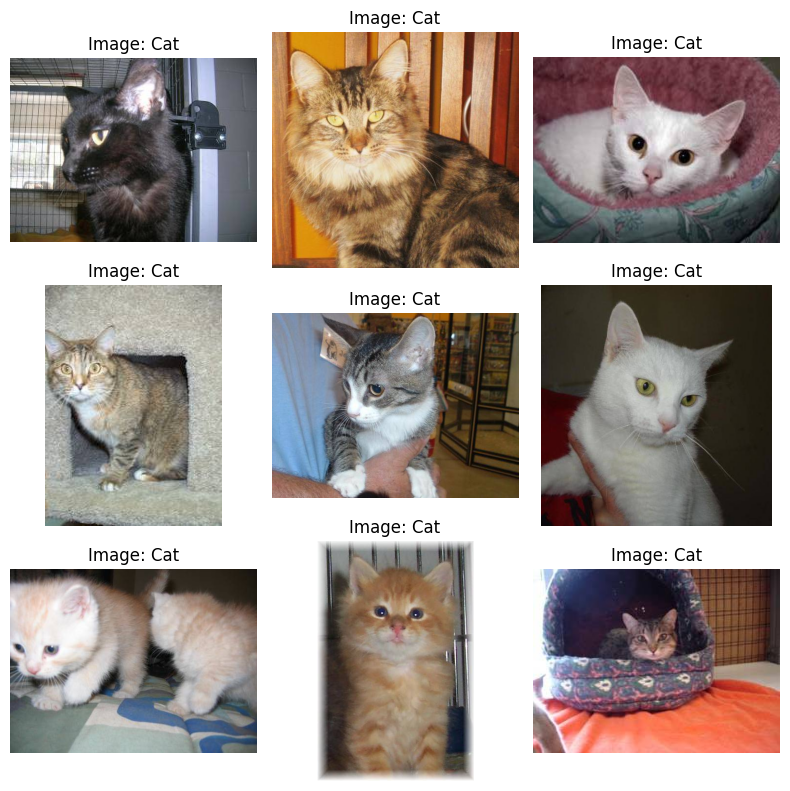

In [24]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

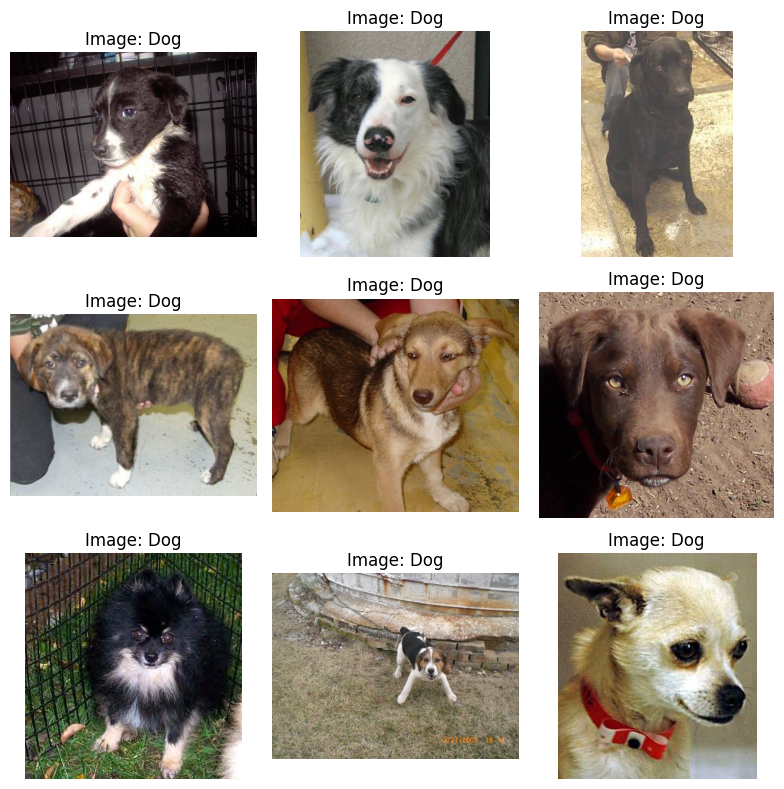

In [25]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

# Data Analysis

**Explanation**

1. **Retrieving Image Lists**
   - `cat_images = os.listdir(cat_directory_path)`:
      - Assumes you have a variable `cat_directory_path` that holds the directory path containing cat images.
      - `os.listdir` gets a list of all the files (and potentially subdirectories) within that directory.
      - This list of filenames is stored in the `cat_images` variable.
   - `dog_images = os.listdir(dog_directory_path)`:
      - Does the same as above, but for a `dog_directory_path` containing dog images.

2. **Defining Classes and Counts**
   - `classes_animals = ['Cats', 'Dogs']`: Creates a list to represent the animal classes present ('Cats' and 'Dogs').
   - `count = [len(cat_images), len(dog_images)]`:
      - `len(cat_images)` calculates the number of files in the `cat_images` list (i.e., the number of cat images).
      - `len(dog_images)` does the same for dog images.
      - This creates a list `count` storing the count of images for each class.

3. **Output**
   - `print(count)`: Prints the `count` list to the console. The output will look something like this if you have more cat images than dog images:


**Key Points**

* **Assumptions:** This code assumes you have variables `cat_directory_path` and `dog_directory_path` that contain the correct paths to your image directories.
* **Data Organization:** This code works best if your directories are structured so that the `cat_directory_path` contains *only* cat image files and  `dog_directory_path` *only* dog image files.




In [27]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]




**1. Imports**

* **matplotlib.pyplot as plt**:  Imports the core Matplotlib library for plotting.

**2. Setup**

* `fig, ax = plt.subplots(1, 2, figsize=(15, 7))`:
   - Creates a figure object (`fig`) and a 1x2 grid of axes (`ax`). This means one row, two columns of plots.
   -  The `figsize` controls the dimensions of the overall figure.

**3. Bar Chart (Subplot 1)**

* `ax[0].bar(classes_animals, count, color=['blue', 'green'])`:
   - `ax[0]` selects the first axes object in the grid, which will be used for the bar chart.
   - `bar()` creates a bar chart. 'classes_animals' is used for the x-axis labels, and 'count' provides the heights of the bars.
   - The `color` argument sets custom colors for the bars.
* `ax[0].set_xlabel('Animal Class')`, `ax[0].set_ylabel('Image Count')`, `ax[0].set_title('Count of Cat and Dog Images')`: These lines add labels to the x-axis, y-axis, and a title for the bar chart.

**4. Pie Chart (Subplot 2)**

* `colors = ['#ff9999','#66b3ff']`: Defines a list of custom colors for the pie chart slices.
* `ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)`:
   - `ax[1]` selects the second axes object for the pie chart.
   - `pie()` creates the pie chart using the 'count' data.
   -  `labels` assigns labels to each slice.
   - `colors` uses the custom color list.
   - `autopct='%1.1f%%'`  formats the slice percentages displayed on the chart.
   - `startangle=90` rotates the pie chart so the first slice starts at the top.
* `ax[1].set_title('Distribution of Cat and Dog Images')`: Sets the title of the pie chart.
* `ax[1].axis('equal')`: Ensures the pie chart is drawn as a circle rather than a potential ellipse.

**5. Layout and Display**

* `plt.tight_layout()`: Adjusts spacing to prevent elements from overlapping.
* `plt.show()`: Displays the combined figure.

**Key Points**

* The `plt.subplots` function is key to creating multiple plots within a single figure.
* Each `ax` object in the created grid represents an individual plot.
* You can customize the appearance of both the bar chart and pie chart extensively through Matplotlib options.




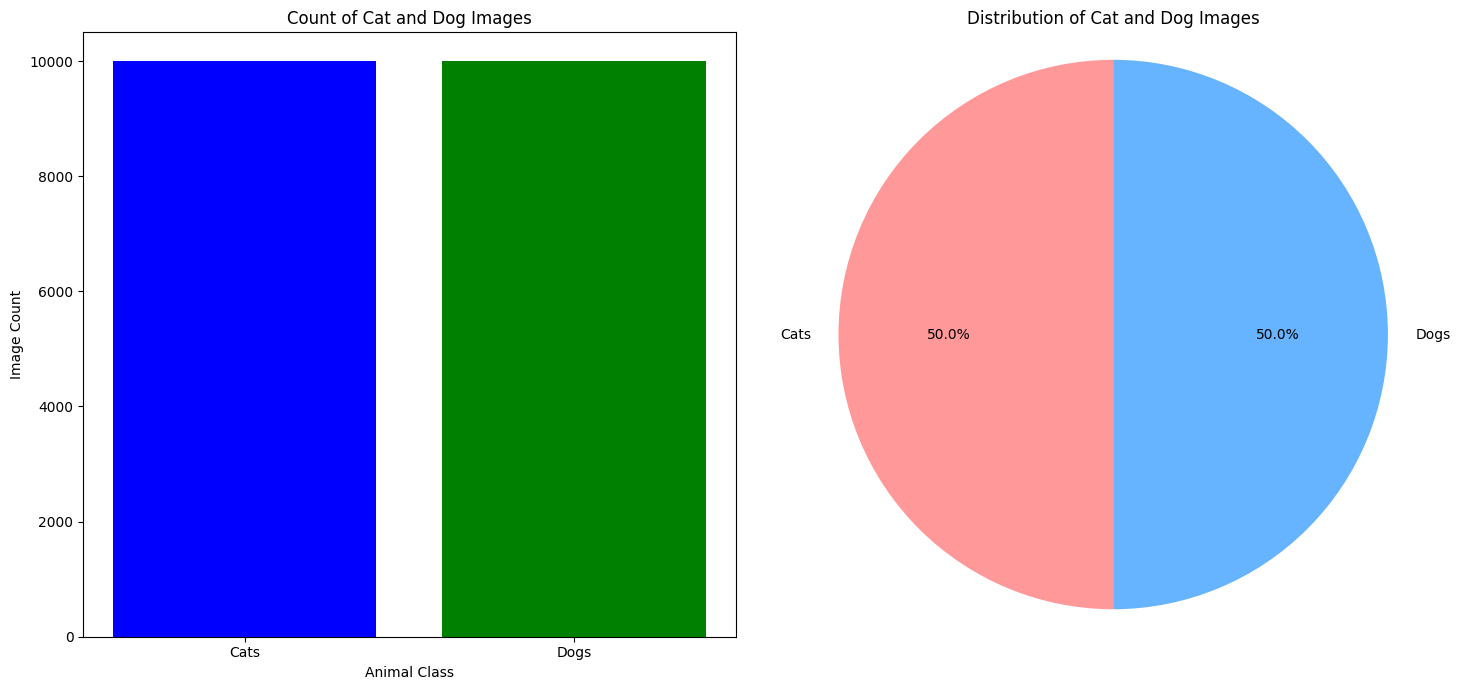

In [28]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()


# Removing Corrupted Images
Absolutely, let's break down how this code helps remove corrupted images from a directory structure.

**1. Imports**

* **os**: Provides functions for interacting with the operating system (listing files, removing files, etc.).
* **cv2**: This imports the OpenCV library, commonly used for image processing tasks. Here, it's used to attempt to open images.
* **imghdr**: This module helps in determining file types, useful for verifying image formats.

**2. Setup**

* **image_exts**:  A list of valid image file extensions. The code focuses on these common formats.
* **data_dir**:  The base directory where you want to start searching for images.

**3. The Main Loop**

* **os.walk(data_dir):**  This function walks through the directory structure starting at 'data_dir'. It iteratively goes into subdirectories and yields 3 values for each subdirectory:
    - **root**: Current directory path
    - **dirs**:  A list of subdirectories within the current directory
    - **files**: A list of files within the current directory

* **for file in files:** Iterates over each file found within a given directory.

* **file_path = os.path.join(root, file):** Constructs the full filepath for the current file.

**4. Corrupted File Detection and Handling**

* **try/except block:**  This is the core error handling mechanism:
    * **imghdr.what(file_path):** Tries to determine the file type. If it's not a recognized image type, `file_type` will be `None`.
    * **if file_type not in image_exts:** Checks if the detected type matches one of the allowed extensions. If not, it's marked as potentially corrupt and deleted.
    * **else:** If the file passes the extension check, it's assumed to be a valid image.
    * **img = cv2.imread(file_path):** OpenCV tries to read the image. If the image is corrupted, this will likely raise an exception.
    * **Exception as e:**  If any exception occurs during filetype checking or image reading, the error is caught here. The script prints the problematic file's path and the error message. Optionally, the file is deleted.

**In Summary**

This code targets two kinds of potential corruption:

1. **Incorrect File Extensions:**  Files that might not actually be images even though they have an image extension.
2. **Damaged Content:** Image files that have become corrupted and can't be opened by image processing tools.



In [29]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

# Loading Shapes and Channels

**Explanation**

1. **Imports:**
   - **numpy as np:** Imports the NumPy library for array manipulation.
   - **from PIL import Image:** Imports the Image class from the PIL (Pillow) library for loading images.

2. **Function Definition:**
   -  `def image_to_array(image_path):`: Defines a function named `image_to_array` that takes a single argument, the `image_path`.

3. **Error Handling (try/except)**:
   - **with Image.open(image_path) as img:** Opens the image file specified by `image_path` and stores the opened image object in the variable `img`. The `with` statement ensures the image file is automatically closed.
   - **image_array = np.array(img):** Converts the PIL Image object (`img`) into a NumPy array and stores it in `image_array`.
   - **return image_array:** If the image opens successfully, the function returns the NumPy array representation of the image.
   - **except IOError:** If there's an Input/Output error (e.g., the file doesn't exist or is not a valid image), this block executes:
       -  It prints an error message indicating the file path.
       -  It returns `None` to signal that the image couldn't be loaded.

**Image Shapes and Channels**

* **Shape:** A NumPy array representing an image generally has the shape `(height, width, channels)`.
    * **height:** Number of pixels vertically.
    * **width:** Number of pixels horizontally.
    * **channels:** Number of color components. Common values:
        * **1:** Grayscale image (single intensity channel)
        * **3:** RGB image (Red, Green, Blue channels)

**Why Convert to NumPy Arrays?**

* **Numerical Computation:**  NumPy is designed for fast and efficient array operations, essential for image processing tasks.
* **Machine Learning Libraries:** Most deep learning libraries (TensorFlow, PyTorch) expect images as input in the form of NumPy arrays.


In [30]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
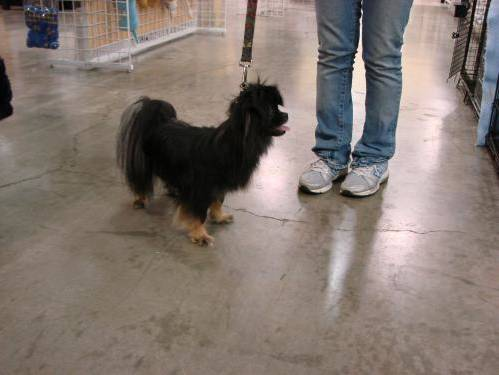

In [31]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

## Using CV2


**Code Purpose**

This code aims to do the following:

1. **Load an Image:** It attempts to load an image using OpenCV's `cv2.imread` function.
2. **Check Validity:** It verifies whether the image was loaded successfully.
3. **Display Information:** If successful, it prints the image data (pixel values) and its shape.

**Explanation**

* **import cv2**: Imports the OpenCV (cv2) library for image processing.

* **image = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'**:  A string variable storing the path to an image file. Make sure this path is correct and points to an existing image file.

* **img = cv2.imread(image)**:  
   - `cv2.imread` attempts to read the image at the specified path.
   - If successful, it stores the image data as a NumPy array in the `img` variable.

* **if img is not None:**:
   - This checks if the image loading was successful.
   - `cv2.imread` can return `None` if the file cannot be found,  the file is corrupt, or the format is not supported.

* **Inside the 'if' block:**
   - **print(img)**: This will print the raw pixel values of the image in a large NumPy array format.
   - **print(img.shape)**: This will print the shape of the image array, typically in the form  `(height, width, channels)`.

* **else:**
   - This block executes if `img is None`, indicating the image wasn't loaded successfully.
   - The error message "The image could not be loaded..." is printed.

**Important Considerations**

* **Correct File Path:** Double-check that the `image` path points to a valid, existing image file. Errors are common here!

* **Image Formats:** OpenCV supports most common image formats (jpg, png, etc.). If you're working with a less common format, make sure OpenCV can read it.

**How to use this code:**

1. **Modify the `image` variable:** Replace the placeholder path with the actual path to your image.
2. **Run the code:** Execute the code in your Python environment.
3. **Inspect the output:**
    * If successful, you'll see the pixel data and image shape.
    * If there's an issue, you'll get the error message.



In [32]:
image = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'

import cv2

img = cv2.imread(image)

# If the image is loaded successfully, print its pixel values
if img is not None:
    print(img)
    print(img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

[[[  4   8   9]
  [  6  11  10]
  [ 11  13  13]
  ...
  [183 162 160]
  [184 161 159]
  [183 160 158]]

 [[ 10  13  17]
  [ 11  15  16]
  [ 15  17  17]
  ...
  [180 159 157]
  [181 158 156]
  [180 157 155]]

 [[  8  12  17]
  [ 10  13  17]
  [ 14  16  17]
  ...
  [178 157 155]
  [179 156 154]
  [178 155 153]]

 ...

 [[ 88  95 110]
  [ 89  96 111]
  [ 90  97 112]
  ...
  [101 111 128]
  [ 99 112 128]
  [ 99 112 128]]

 [[ 88  95 110]
  [ 87  94 109]
  [ 88  95 110]
  ...
  [102 112 129]
  [100 113 129]
  [100 113 129]]

 [[ 91  98 113]
  [ 88  95 110]
  [ 87  94 109]
  ...
  [ 98 108 125]
  [ 96 109 125]
  [ 96 109 125]]]
(375, 499, 3)


## Using python

In [33]:
# Import necessary libraries
import numpy as np
from PIL import Image


# Load the image with PIL and convert to a NumPy array
img_pil = Image.open(image)
img_array = np.array(img_pil)

# Print the NumPy array of the image
print(img_array)

# Print the NumPy array of the image
print(img_array.shape)

[[[  9   8   4]
  [ 10  11   6]
  [ 13  13  11]
  ...
  [160 162 183]
  [159 161 184]
  [158 160 183]]

 [[ 17  13  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 180]
  [156 158 181]
  [155 157 180]]

 [[ 17  12   8]
  [ 17  13  10]
  [ 17  16  14]
  ...
  [155 157 178]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 111 101]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 112 102]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 108  98]
  [125 109  96]
  [125 109  96]]]
(375, 499, 3)


In [34]:
for i,j,k in os.walk('/content/dogs_vs_cats'):
    print(i,j,k)

/content/dogs_vs_cats ['test', 'train'] []
/content/dogs_vs_cats/test ['cats', 'dogs'] []
/content/dogs_vs_cats/test/cats [] ['cat.10950.jpg', 'cat.11792.jpg', 'cat.8293.jpg', 'cat.9921.jpg', 'cat.9006.jpg', 'cat.10843.jpg', 'cat.10259.jpg', 'cat.1286.jpg', 'cat.9147.jpg', 'cat.2368.jpg', 'cat.9553.jpg', 'cat.11415.jpg', 'cat.10856.jpg', 'cat.6310.jpg', 'cat.10048.jpg', 'cat.6781.jpg', 'cat.7915.jpg', 'cat.5923.jpg', 'cat.8581.jpg', 'cat.7195.jpg', 'cat.11485.jpg', 'cat.9662.jpg', 'cat.3400.jpg', 'cat.6400.jpg', 'cat.1514.jpg', 'cat.11545.jpg', 'cat.11355.jpg', 'cat.4345.jpg', 'cat.1772.jpg', 'cat.8577.jpg', 'cat.4828.jpg', 'cat.12378.jpg', 'cat.11683.jpg', 'cat.12407.jpg', 'cat.5981.jpg', 'cat.8668.jpg', 'cat.3103.jpg', 'cat.8415.jpg', 'cat.7749.jpg', 'cat.4059.jpg', 'cat.3811.jpg', 'cat.10462.jpg', 'cat.8340.jpg', 'cat.639.jpg', 'cat.7238.jpg', 'cat.5944.jpg', 'cat.5440.jpg', 'cat.337.jpg', 'cat.3517.jpg', 'cat.11364.jpg', 'cat.10756.jpg', 'cat.4254.jpg', 'cat.8450.jpg', 'cat.6944.jp

In [35]:
!pip3 install opencv-python

# Building Model

In [37]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

Let's break down how this code sets up the image loading and data augmentation pipelines for training a machine learning model, specifically an image classifier for dogs vs. cats.

**Code Explanation**

**Setting the Scene**

* **base_dir = '/content/dogs_vs_cats/train'**: This line defines a variable `base_dir` that holds the path to the root directory of your training dataset. The structure here assumes images of cats and dogs are in separate subfolders within the 'train' directory.

**ImageDataGenerator**

* **train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)**
    - Creates an `ImageDataGenerator` object named `train_datagen`. This is the key tool for real-time data augmentation. Let's break down the parameters:
        - **rescale=1./255**:  Normalizes pixel values by dividing them by 255 so they fall within the range of [0, 1]. This is a common preprocessing step for image data.
        - **validation_split=0.2**: Instructs the generator to reserve 20% of the data from the base directory for the validation set.

**Generators**

 * **train_generator = train_datagen.flow_from_directory(...)**
    - Calls the `flow_from_directory` method of the `train_datagen` object. This creates a generator that will yield batches of image data with augmentation applied. Let's look at the parameters:
        - **base_dir**: The path from which to take images (from the previous step).
        - **target_size=(150, 150)**: All images will be resized to 150x150 pixels.
        - **batch_size=20**: The generator will yield batches of 20 images.
        - **class_mode='binary'**:  Important for a cat vs. dog classifier, this tells the generator to create binary labels (0 for one class, 1 for the other).
        - **subset='training'**: Specifies that this generator produces data for the training set.

* **validation_generator= train_datagen.flow_from_directory(...)**
   - Creates a similar generator for the validation set. It uses the same preprocessing and augmentation as the training generator, ensuring consistency.  The key difference is `subset='validation'`.

**Key Points**

* **Data Augmentation:** The `ImageDataGenerator` will apply random transformations (rotations, shifts, flipping, etc.) to each image in a batch before the model sees it. This helps prevent overfitting by reducing the chance your model memorizes the exact details of the training images.

* **flow_from_directory**: This is designed to work with a directory structure where images of different classes are in separate subfolders.



In [38]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Getting Class Labels

In [39]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


# visualising the Batch Images

In [40]:
images, labels = next(train_generator)
images, labels

(array([[[[0.27058825, 0.2509804 , 0.2392157 ],
          [0.2627451 , 0.24313727, 0.23137257],
          [0.27058825, 0.2509804 , 0.2392157 ],
          ...,
          [0.627451  , 0.49411768, 0.48627454],
          [0.63529414, 0.5019608 , 0.49411768],
          [0.6392157 , 0.52156866, 0.5137255 ]],
 
         [[0.2784314 , 0.25882354, 0.24705884],
          [0.27450982, 0.25490198, 0.24313727],
          [0.27450982, 0.25490198, 0.24313727],
          ...,
          [0.5921569 , 0.45882356, 0.45098042],
          [0.61960787, 0.48627454, 0.4784314 ],
          [0.6627451 , 0.54509807, 0.5372549 ]],
 
         [[0.29411766, 0.27450982, 0.2627451 ],
          [0.2901961 , 0.27058825, 0.25882354],
          [0.28235295, 0.2627451 , 0.2509804 ],
          ...,
          [0.5882353 , 0.47450984, 0.45882356],
          [0.5882353 , 0.47450984, 0.45882356],
          [0.627451  , 0.5137255 , 0.49803925]],
 
         ...,
 
         [[0.5019608 , 0.427451  , 0.27058825],
          [0.50980

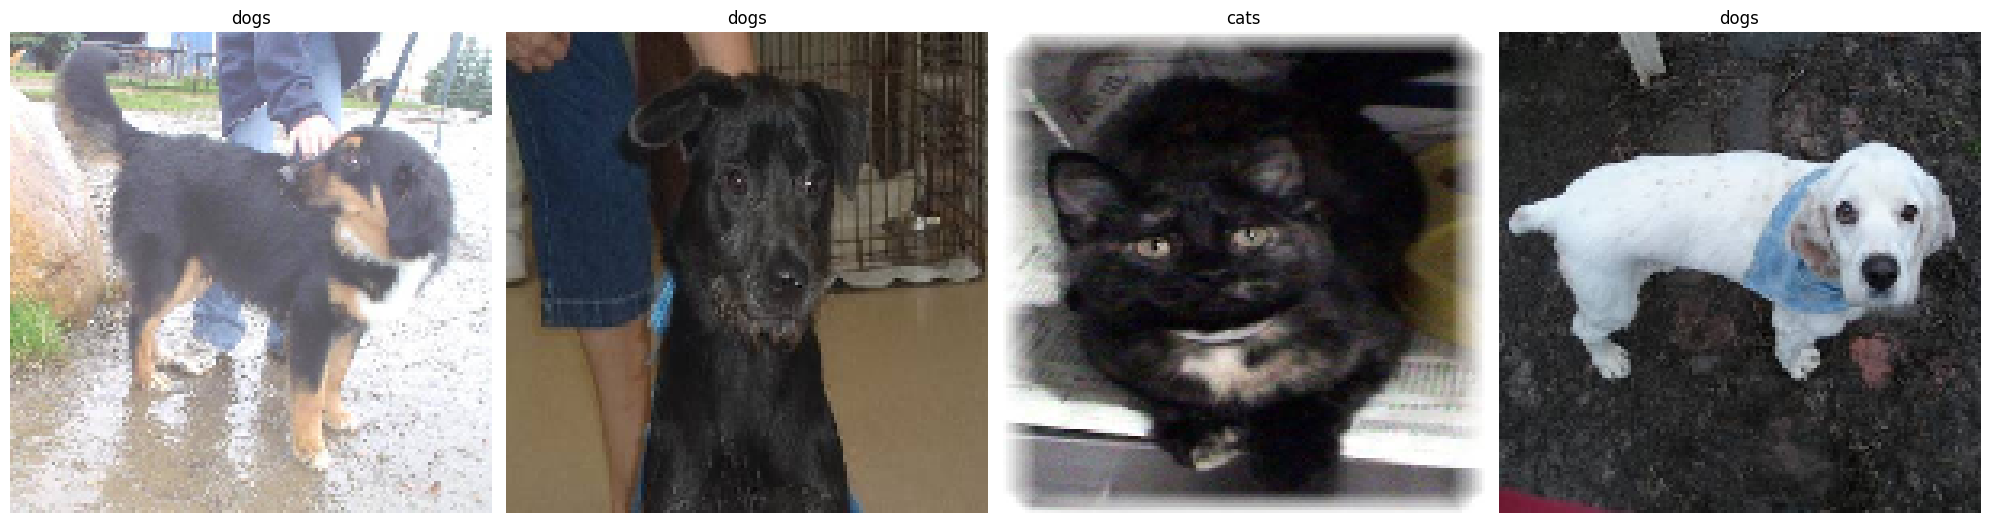

In [41]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [42]:
train_generator.reset()

# Basic CNN Model
Let's break down the construction of your basic convolutional neural network (CNN) model and understand its architecture.

**1. Imports**
* You'll need the following imports from TensorFlow/Keras:

   ```python
   import tensorflow as tf
   from tensorflow.keras import models, layers
   ```

**2. Building the Model (`models.Sequential`)**

* **models.Sequential()**: This creates a sequential model in Keras, which means layers are added linearly, one after the other.

**3. The Layers**

* **layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))**:
   - First convolutional layer:
     - 32 filters (the number of "feature detectors" to learn).
     - Kernel size of (3, 3) (the size of the sliding window over the image).
     - 'relu' activation function (a common non-linearity).
     - input_shape specifies the shape of the input images (150x150 pixels, 3 color channels).

* **layers.MaxPooling2D(2, 2)**:
    - Max pooling layer with a pool size of (2, 2). Downsamples the representation by taking the maximum value in each 2x2 window, reducing dimensionality and making the model more robust to small variations in the image.

* **Similar Convolutional Blocks:** The next few lines add more convolutional layers (`Conv2D`) followed by max pooling (`MaxPooling2D`) layers.  Notice how the number of filters (feature detectors) increases (32 -> 64 -> 128).

* **layers.Flatten()**: Flattens the output of the convolutional layers into a 1D vector, preparing it to be fed into dense layers.

* **layers.Dense(512, activation='relu')**:
   - A fully-connected (dense) layer with 512 units and the 'relu' activation function.

* **layers.Dense(1, activation='sigmoid')**:  
   - The final output layer with a single unit and a  'sigmoid' activation function. This is suitable for binary classification (cat vs. dog) because the sigmoid function outputs a probability between 0 and 1.

**4. model.summary()**

* This command  prints a summary of your model's architecture, including the name of each layer, its output shape, and the number of parameters it contains.

**Key Points**

* **CNNs for Images:**  CNNs are powerful for image tasks because their convolutional layers learn hierarchical features – detecting basic edges early on and more complex shapes (like eyes or ears) in later layers.

* **Architecture Intuition:** This architecture gradually reduces spatial dimensions (150x150 to smaller and smaller representations) while increasing the number of feature channels, allowing the model to learn more abstract representations.

**Next Steps**
 1. **Compile the model:** You'd need to compile the model with an optimizer, loss function (like 'binary_crossentropy' for this case), and metrics.
 2. **Train the model:** Fit the model using the `train_generator` (and potentially `validation_generator`) you created in the previous code snippet.



In [43]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

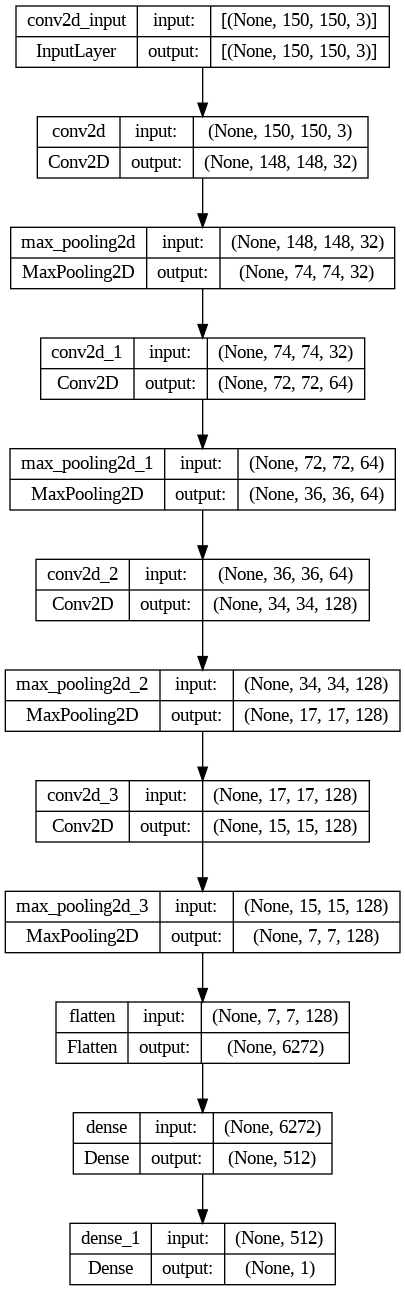

In [44]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

## Parameter Calculation in CNN Layers

### Conv2D Layer

The formula to calculate the number of parameters in a Conv2D layer is:

$$\text{Parameters} = (\text{kernel\_height} \times \text{kernel\_width} \times \text{input\_channels} + 1) \times \text{number\_of\_filters}$$

The "+1" accounts for the bias term for each filter.

#### 1. First Conv2D Layer

- Input shape: (150, 150, 3)
- Number of filters: 32
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$

#### 2. Second Conv2D Layer

- Input channels: 32 (from the previous Conv2D layer)
- Number of filters: 64
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 32 + 1) \times 64 = 18,496$$

#### 3. Third Conv2D Layer

- Input channels: 64
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 64 + 1) \times 128 = 73,856$$

#### 4. Fourth Conv2D Layer

- Input channels: 128
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 128 + 1) \times 128 = 147,584$$

### MaxPooling2D Layer

MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer

The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer

The formula for a Dense (fully connected) layer is:

$$\text{Parameters} = (\text{input\_size} + 1) \times \text{output\_size}$$

#### 1. First Dense Layer

- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: $$(X + 1) \times 512$$

#### 2. Second Dense Layer

- Input size: 512
- Output size: 1 (for binary classification)
- Parameters: $$(512 + 1) \times 1 = 513$$


In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [47]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 43s 46ms/step - loss: 0.6489 - accuracy: 0.6028 - val_loss: 0.5812 - val_accuracy: 0.6967
Epoch 2/10
800/800 [==============================] - 40s 50ms/step - loss: 0.5339 - accuracy: 0.7316 - val_loss: 0.4747 - val_accuracy: 0.7803
Epoch 3/10
800/800 [==============================] - 41s 51ms/step - loss: 0.4514 - accuracy: 0.7879 - val_loss: 0.4275 - val_accuracy: 0.8062
Epoch 4/10
800/800 [==============================] - 36s 45ms/step - loss: 0.3870 - accuracy: 0.8257 - val_loss: 0.3920 - val_accuracy: 0.8275
Epoch 5/10
800/800 [==============================] - 37s 46ms/step - loss: 0.3311 - accuracy: 0.8547 - val_loss: 0.3631 - val_accuracy: 0.8330
Epoch 6/10
800/800 [==============================] - 37s 46ms/step - loss: 0.2734 - accuracy: 0.8851 - val_loss: 0.3625 - val_accuracy: 0.8438
Epoch 7/10
800/800 [==============================] - 36s 45ms/step - loss: 0.2187 - accuracy: 0.9091 - val_loss: 0.3484 - val_accuracy:

In [48]:
history

In [49]:
history.history

{'loss': [0.6488993763923645,
  0.5339470505714417,
  0.451354056596756,
  0.38699159026145935,
  0.3310500681400299,
  0.27343374490737915,
  0.2187385857105255,
  0.1678934246301651,
  0.12732908129692078,
  0.09972628206014633],
 'accuracy': [0.6027500033378601,
  0.7316250205039978,
  0.7878749966621399,
  0.8256875276565552,
  0.8547499775886536,
  0.8851249814033508,
  0.9090625047683716,
  0.9315000176429749,
  0.9520624876022339,
  0.9591249823570251],
 'val_loss': [0.5812444686889648,
  0.4747046232223511,
  0.4274599850177765,
  0.39195123314857483,
  0.36310938000679016,
  0.3625195622444153,
  0.34841611981391907,
  0.3924129605293274,
  0.4083583354949951,
  0.48953667283058167],
 'val_accuracy': [0.6967499852180481,
  0.7802500128746033,
  0.8062499761581421,
  0.8274999856948853,
  0.8330000042915344,
  0.84375,
  0.8585000038146973,
  0.8539999723434448,
  0.8672500252723694,
  0.8565000295639038]}

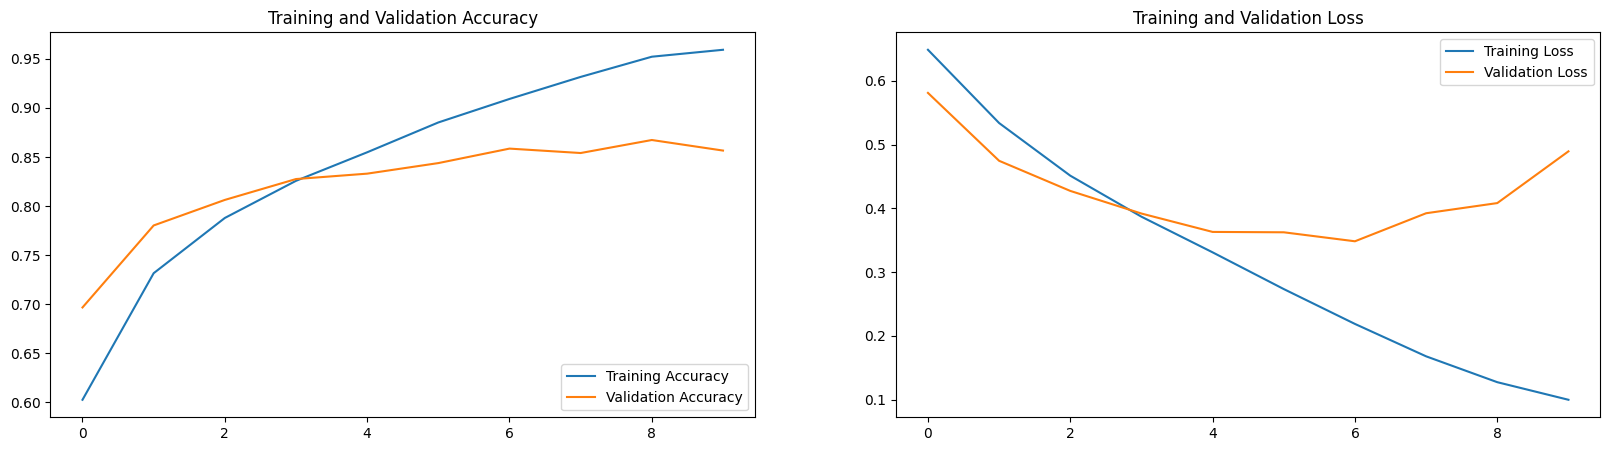

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evluation


## Initiating Test Generator

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


## Making test predictions

In [52]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [53]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 9s 35ms/step


array([[2.4689794e-11],
       [3.4171745e-07],
       [3.7465835e-08],
       ...,
       [9.9994540e-01],
       [7.8825963e-01],
       [9.3118459e-01]], dtype=float32)

In [54]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 31ms/step


array([0, 0, 0, ..., 1, 1, 1])

## Plotting confusion Matrix

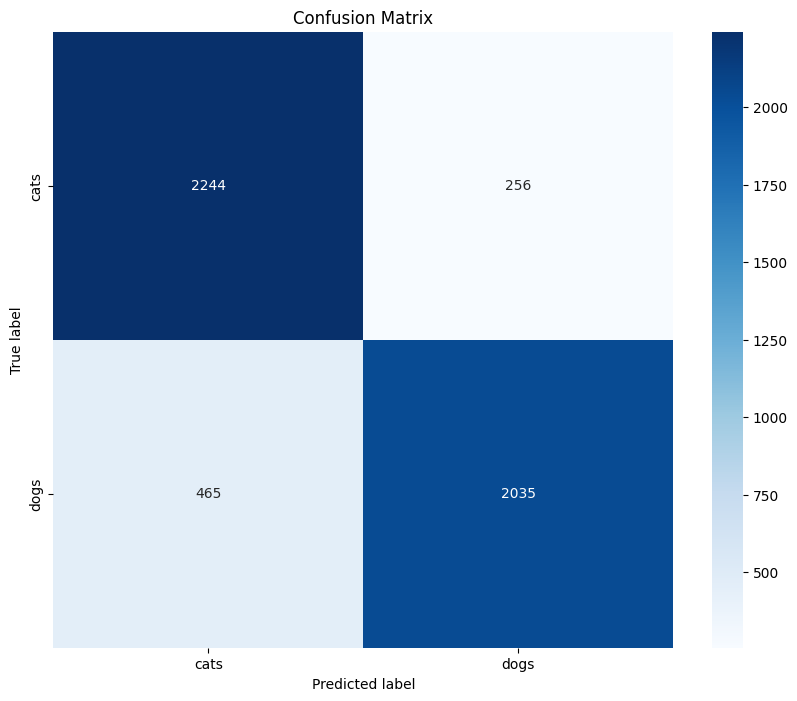

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Inference

In [56]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 9s 35ms/step - loss: 0.5168 - accuracy: 0.8558
Test accuracy: 85.58%
Test loss: 0.52


# Single Image Prediction

In [57]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

In [59]:
# Load and preprocess the image
img_path = '/content/download.jpeg'
make_prediction(img_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/download.jpeg'

1/1 [==============================] - 0s 358ms/step
Prediction: [[0.9885881]]


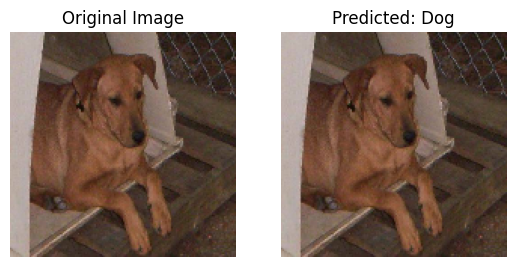

In [60]:
# Load and preprocess the image
img_path = '/content/dogs_vs_cats/test/dogs/dog.100.jpg'
make_prediction(img_path)

# MisClassifcaitons

In [61]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 9s 34ms/step
Total misclassifications in the test set: 721 out of 5000


250/250 [==============================] - 9s 34ms/step
Total misclassifications: 721


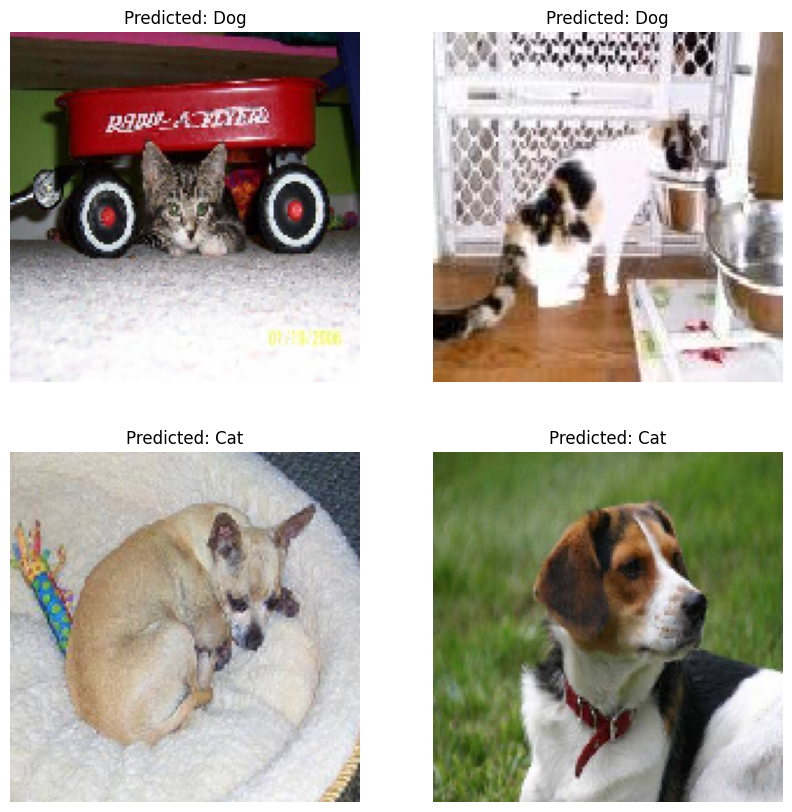

In [62]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

# Visualising the kernel feature maps.

In [63]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)
layer number 6 conv2d_3 (3, 3, 128, 128)


In [64]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [65]:
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [66]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

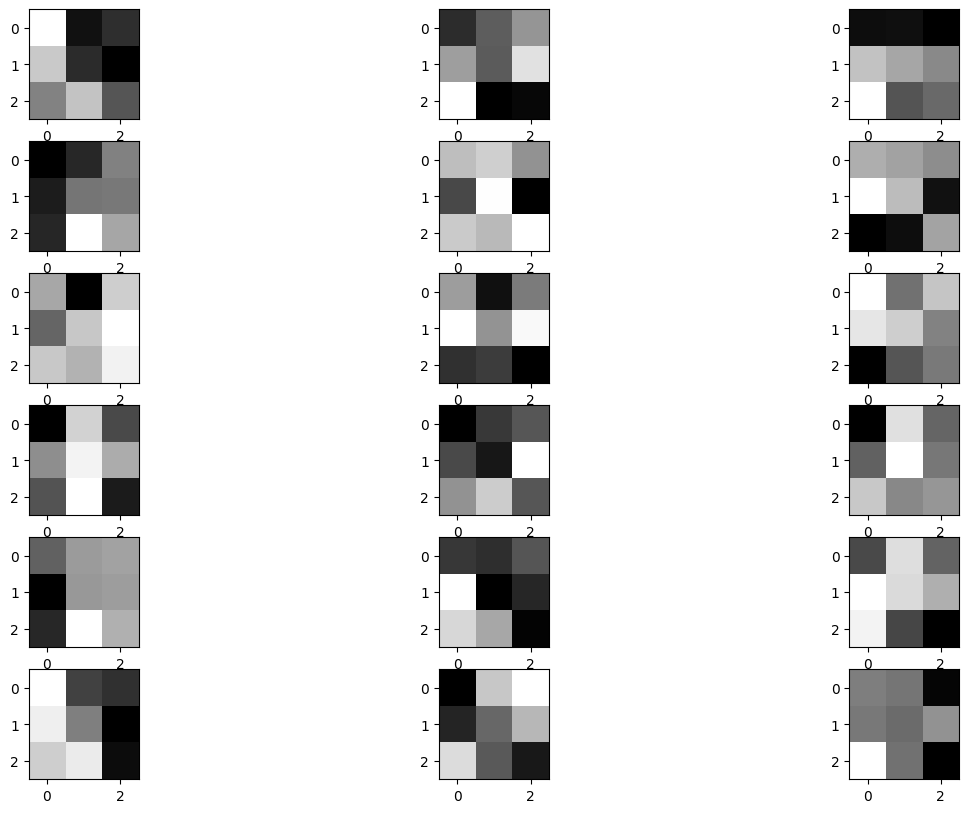

In [67]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 [==============================] - 0s 37ms/step


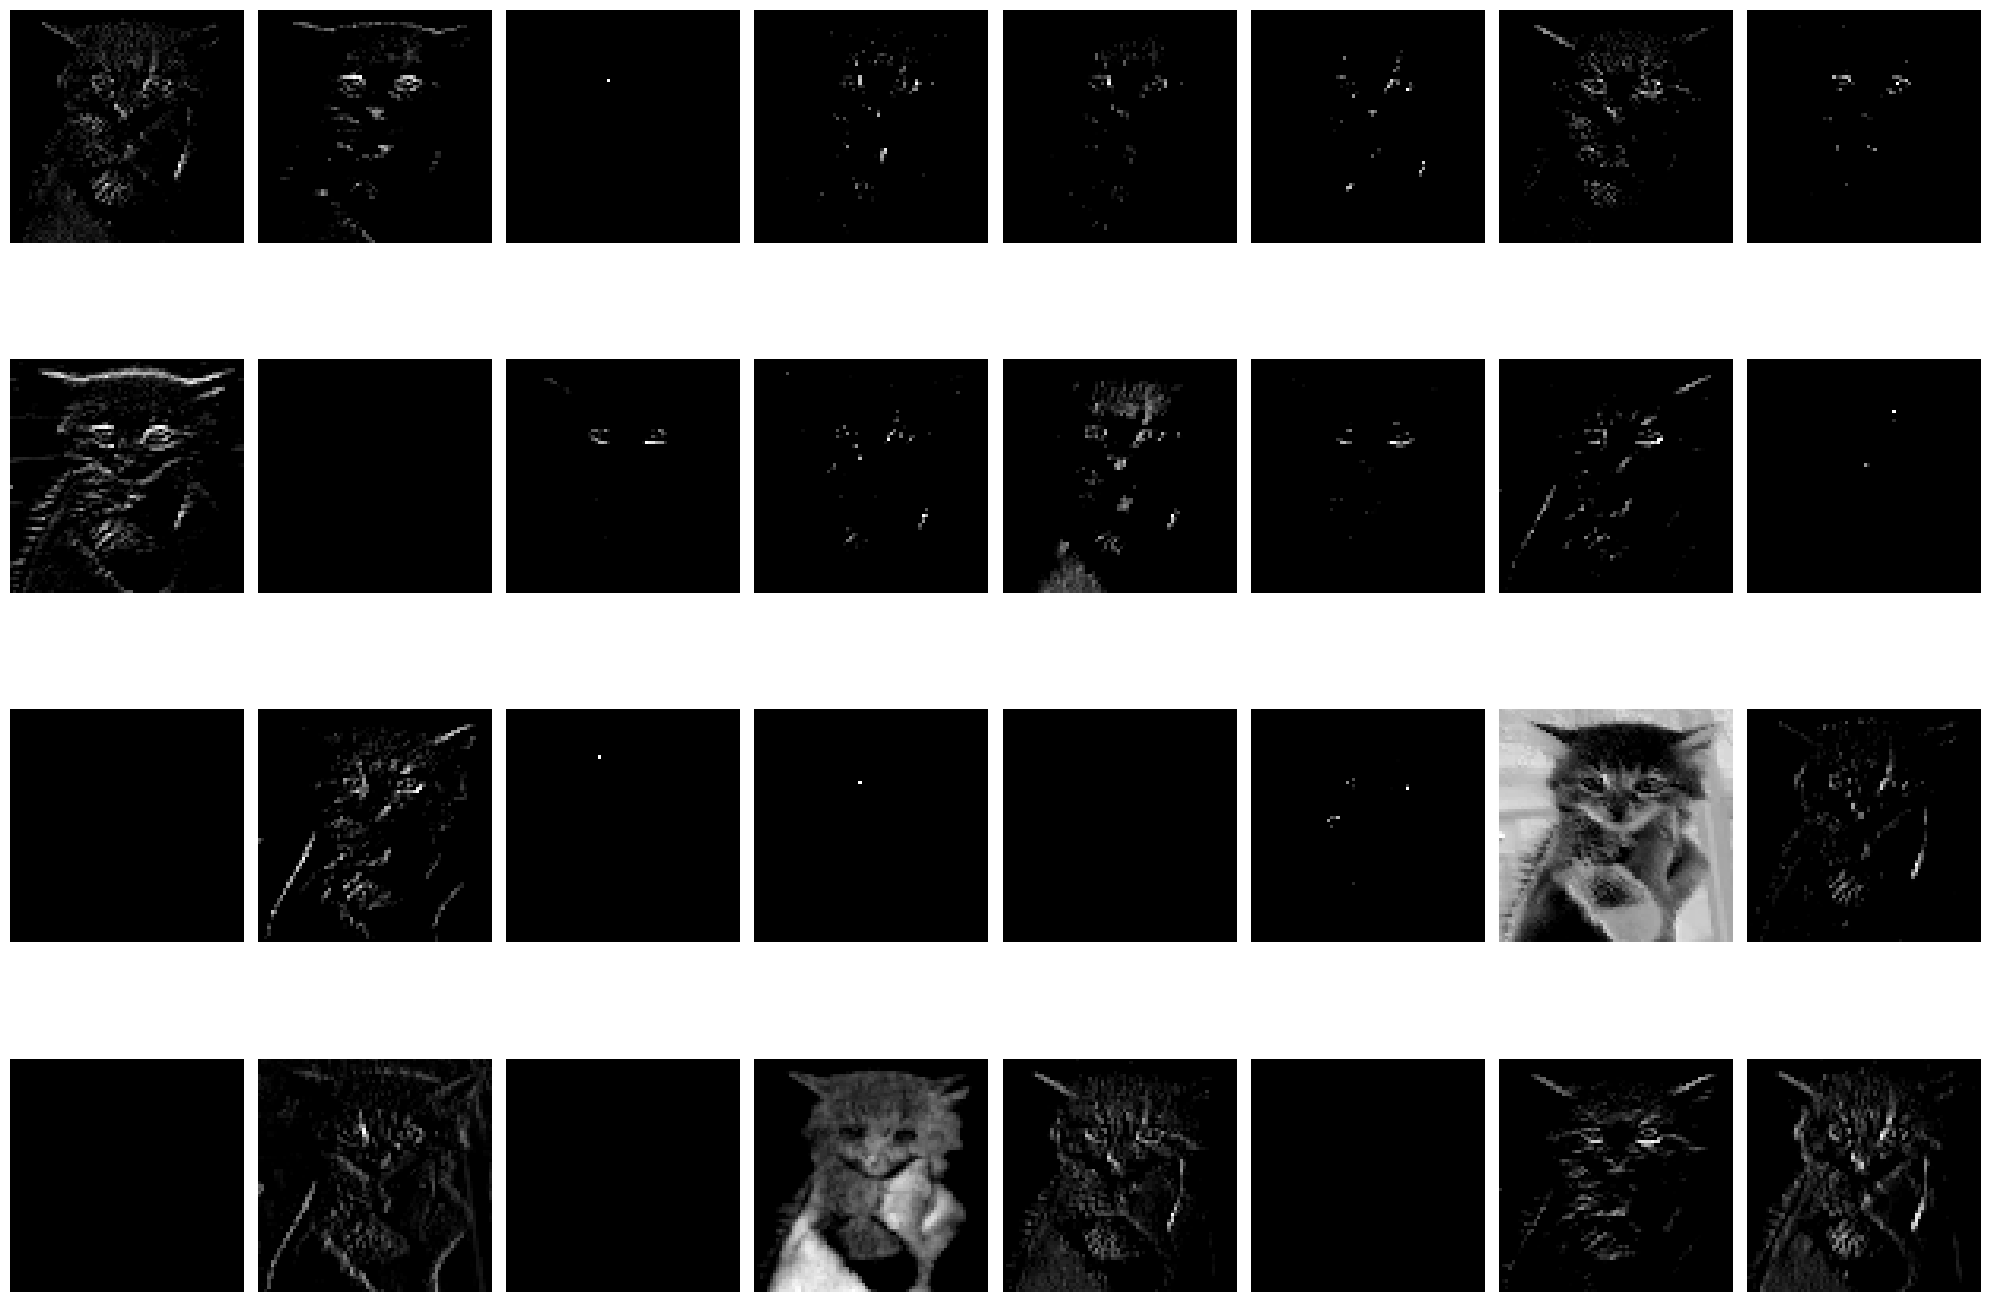

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Next Session we Shall learn

# Going Further

After training your model, you might find that it performs either better or worse than expected. Here are a few steps you can take to improve its performance:

- **Data Augmentation**: This involves artificially increasing the size and variability of your training dataset by applying random transformations like rotation, zoom, flip, etc. This helps the model generalize better. You can implement data augmentation by adding parameters to `ImageDataGenerator`.

- **Adjust the Model Architecture**: You might want to experiment with adding more convolutional layers, changing the size of the filters, or adjusting the number of neurons in the dense layers. The architecture of your CNN can greatly influence its performance.

- **Hyperparameter Tuning**: Experiment with different optimizers, learning rates, and other hyperparameters to find the best combination for your model.

- **Regularization**: To prevent overfitting, consider adding dropout layers to your model or using L2 regularization.

- **Transfer Learning**

- **Model Saving**

- **Model Deployement**

Here's how you could implement data augmentation as an example:

```python
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
